# Files & imports

In [4]:
from pandas import read_csv, DataFrame

# https://www.kaggle.com/datasets/mkechinov/direct-messaging/data 

filename = "messages-demo.csv"
file_tag = "ecom_msg"
data: DataFrame = read_csv(filename, na_values="")

data.shape

(10000000, 32)

In [20]:
%run "dslabs_functions.py"

# Dimensionality

Understand the ratio between the number of records and variables

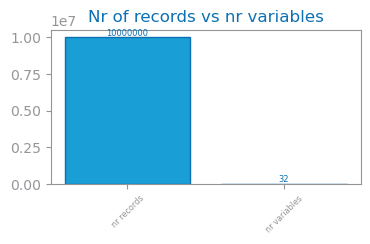

In [5]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
#savefig(f"./{file_tag}_records_variables.png") #save for later step
show()

## Missing values

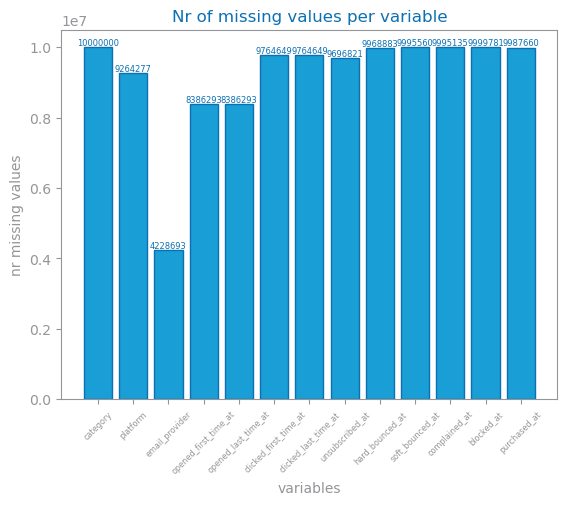

In [6]:
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"./{file_tag}_mv.png")
show()

## Variables types

In [7]:
data.dtypes

id                         int64
message_id                object
campaign_id                int64
message_type              object
client_id                  int64
channel                   object
category                 float64
platform                  object
email_provider            object
stream                    object
date                      object
sent_at                   object
is_opened                 object
opened_first_time_at      object
opened_last_time_at       object
is_clicked                object
clicked_first_time_at     object
clicked_last_time_at      object
is_unsubscribed           object
unsubscribed_at           object
is_hard_bounced           object
hard_bounced_at           object
is_soft_bounced           object
soft_bounced_at           object
is_complained             object
complained_at             object
is_blocked                object
blocked_at                object
is_purchased              object
purchased_at              object
created_at

In [6]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types

In [7]:
variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
#savefig(f"./{file_tag}_variable_types.png")
show()

{'numeric': ['id', 'campaign_id', 'client_id', 'category'], 'binary': ['is_opened', 'is_clicked', 'is_unsubscribed', 'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_blocked', 'is_purchased'], 'date': ['date', 'sent_at', 'opened_first_time_at', 'opened_last_time_at', 'clicked_first_time_at', 'clicked_last_time_at', 'unsubscribed_at', 'hard_bounced_at', 'soft_bounced_at', 'complained_at', 'blocked_at', 'purchased_at'], 'symbolic': ['message_id', 'message_type', 'channel', 'platform', 'email_provider', 'stream', 'created_at', 'updated_at']}


NameError: name 'figure' is not defined

In [10]:
symbolic: list[str] = variable_types["symbolic"]
data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))
data.dtypes

id                                int64
message_id                     category
campaign_id                       int64
message_type                   category
client_id                         int64
channel                        category
category                        float64
platform                       category
email_provider                 category
stream                         category
date                     datetime64[ns]
sent_at                  datetime64[ns]
is_opened                        object
opened_first_time_at     datetime64[ns]
opened_last_time_at      datetime64[ns]
is_clicked                       object
clicked_first_time_at    datetime64[ns]
clicked_last_time_at     datetime64[ns]
is_unsubscribed                  object
unsubscribed_at          datetime64[ns]
is_hard_bounced                  object
hard_bounced_at          datetime64[ns]
is_soft_bounced                  object
soft_bounced_at          datetime64[ns]
is_complained                    object


# Distribution

In [12]:
summary5: DataFrame = data.describe(include="all")
summary5

,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,...,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
count,1.000000e+07,10000000,1.000000e+07,10000000,1.000000e+07,10000000,0.0,735723,5771307,10000000,...,10000000,4440,10000000,4865,10000000,219,10000000,12340,10000000,10000000
unique,NaN,10000000,NaN,3,NaN,3,NaN,4,205,1,...,2,NaN,2,NaN,2,NaN,2,NaN,10000000,10000000
top,NaN,0000005b-3089-4eb7-95af-594d59816745,NaN,bulk,NaN,email,NaN,desktop,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:54:55.976684,2023-04-27 08:54:55.977487
freq,NaN,1,NaN,7062395,NaN,5771209,NaN,552380,3175809,10000000,...,9995560,NaN,9995135,NaN,9999781,NaN,9987660,NaN,1,1
mean,4.500356e+07,NaN,3.988569e+03,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-05-24 14:49:14.026126848,NaN,2021-06-07 21:12:10.311202304,NaN,2021-05-21 16:01:02.410958848,NaN,2021-05-25 21:32:13.460049664,NaN,NaN
min,3.520546e+06,NaN,2.600000e+01,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-04-30 12:25:08,NaN,2021-04-30 05:20:09,NaN,2021-05-02 10:28:40,NaN,2021-04-30 02:37:50,NaN,NaN
25%,1.972215e+07,NaN,7.900000e+01,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-05-21 15:25:26,NaN,2021-05-22 00:40:06,NaN,2021-05-22 08:44:05,NaN,2021-05-17 09:17:55.750000128,NaN,NaN
50%,5.603027e+07,NaN,1.500000e+02,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-05-22 15:27:38,NaN,2021-05-30 04:00:30,NaN,2021-05-22 11:35:01,NaN,2021-05-25 08:28:48,NaN,NaN
75%,5.853027e+07,NaN,2.980000e+02,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-05-28 22:25:05,NaN,2021-06-15 14:25:23,NaN,2021-05-22 18:27:26,NaN,2021-06-04 09:02:38.750000128,NaN,NaN
max,6.103027e+07,NaN,2.051900e+04,NaN,1.515916e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-06-15 04:25:06,NaN,2022-01-20 11:00:06,NaN,2021-06-10 09:25:23,NaN,2021-11-18 16:41:18,NaN,NaN


Numerical variables:

In [15]:
#Use a variable from the dataset - Note: i dont have numeric variables in my dataset 
var: str = "-"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tMean: ", summary5[var]["mean"])
print("\tStDev: ", summary5[var]["std"])
print("\tMin: ", summary5[var]["min"])
print("\tQ1: ", summary5[var]["25%"])
print("\tMedian: ", summary5[var]["50%"])
print("\tQ3: ", summary5[var]["75%"])
print("\tMax: ", summary5[var]["max"])

Summary for email_provider variable:
	Count:  5771307
	Mean:  nan
	StDev:  nan
	Min:  nan
	Q1:  nan
	Median:  nan
	Q3:  nan
	Max:  nan


Non-numerical variables:

In [16]:
var = "email_provider"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tUnique: ", summary5[var]["unique"])
print("\tTop: ", summary5[var]["top"])
print("\tFreq: ", summary5[var]["freq"])

Summary for email_provider variable:
	Count:  5771307
	Unique:  205
	Top:  mail.ru
	Freq:  3175809


## Symbolic Variables

In [8]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT



symbolic: list[str] = variable_types["symbolic"] + variable_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = data[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

KeyboardInterrupt: 

## Balancing and Class distribution


is_unsubscribed
f    9696821
t     303179
Name: count, dtype: int64


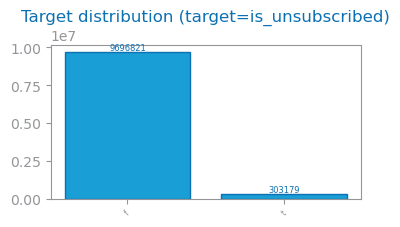

In [18]:
target = "is_unsubscribed"

values: Series = data[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"./{file_tag}_class_distribution.png")
show()